e:\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4709 - loss: 0.6947 - val_accuracy: 0.6593 - val_loss: 0.6911
Epoch 2/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5467 - loss: 0.6917 - val_accuracy: 0.6593 - val_loss: 0.6885
Epoch 3/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6058 - loss: 0.6895 - val_accuracy: 0.6593 - val_loss: 0.6861
Epoch 4/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6337 - loss: 0.6859 - val_accuracy: 0.6593 - val_loss: 0.6809
Epoch 5/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6603 - loss: 0.6802 - val_accuracy: 0.6593 - val_loss: 0.6720
Epoch 6/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6541 - loss: 0.6712 - val_accuracy: 0.6593 - val_loss: 0.6550
Epoch 7/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6432 - loss: 0.6617 - val_accuracy: 0.6593 - val_loss: 0.6400
Epoch 8/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6469 - loss: 0.6536 - val_accuracy: 0.

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9571 - loss: 0.1379
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


<ipython-input-1-1d4d34b2f490>:179: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_parcial])


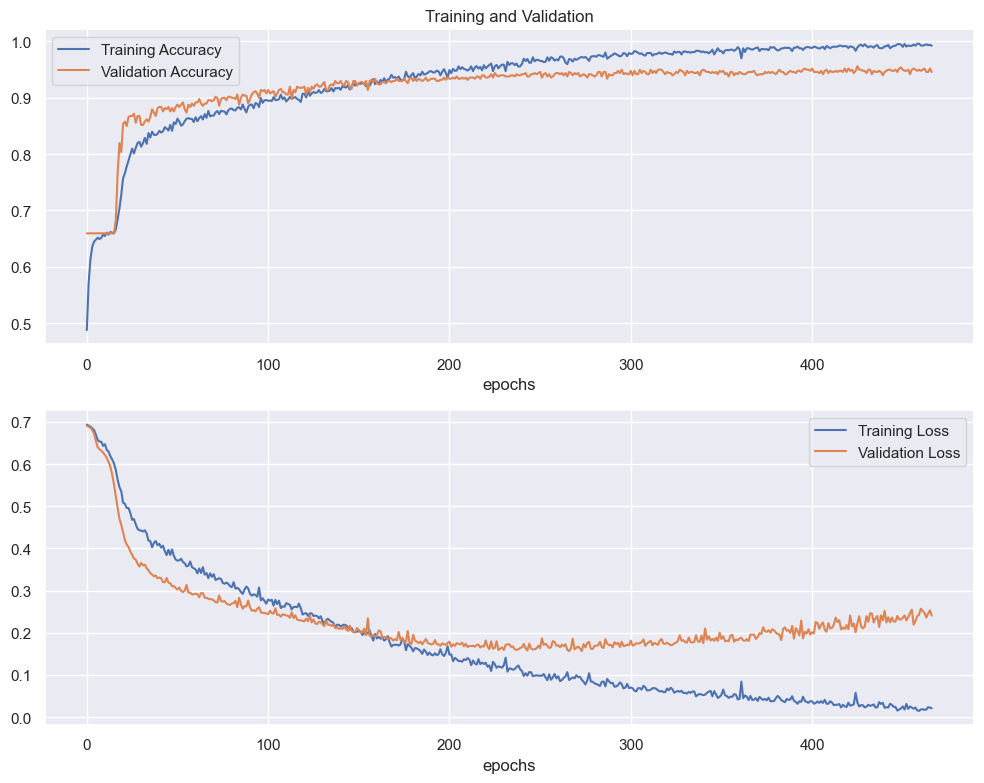

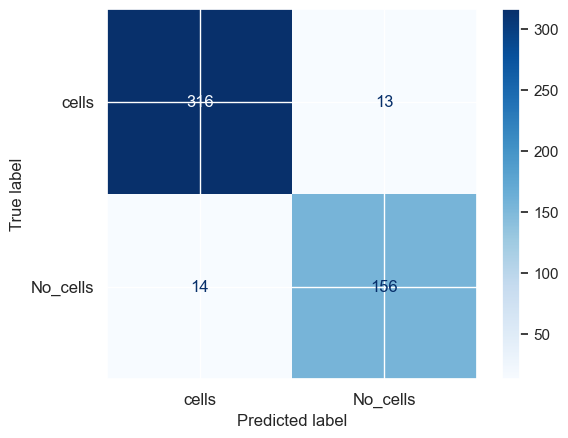

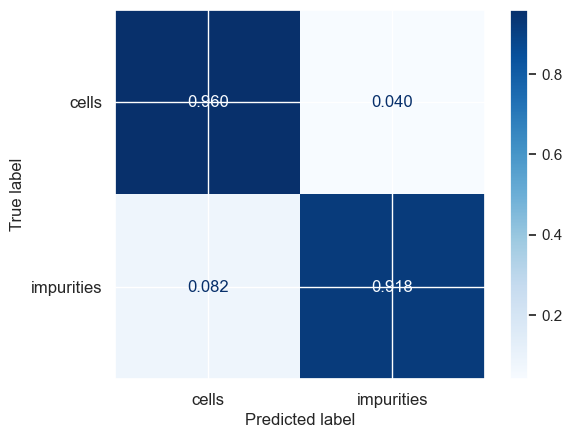

In [ ]:
from models import cnn_models as cnnmodel
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

def environment_model_graph(data1, name1, data2, name2, data3, name3, data4, name4, rootsave, nameSave = "graph", var_title="graph", xlabel="Axes X", ylabel="Axes Y"):
    num_epochs = len(data1[0])
    x = [i for i in range(num_epochs)]
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    for i,j,m,n in zip(data1[0], data2[0], data3[0], data4[0]):
        y1.append(i)
        y2.append(j)
        y3.append(m)
        y4.append(n)
            
    sns.set(style="darkgrid")
    
    fig, axes = plt.subplots(2,1,figsize=(10,8))
    
    axes[0].plot(x, y1, label=name1)
    axes[0].plot(x, y2, label=name2)
    axes[0].set_title(var_title)
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)
    axes[0].legend()
    
    axes[1].plot(x, y3, label=name3)
    axes[1].plot(x, y4, label=name4)
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel(ylabel)
    axes[1].legend()
    
    plt.tight_layout()
    
    name = nameSave+'.png'
    plt.savefig(rootsave+name, dpi=300)

def normResults(y_pred):
    yp = []
    for row in y_pred:
        valmax = max(row)
        for i in range(len(row)):
            if row[i] == valmax:
                row[i] = 1
            else:
                row[i] = 0
        
        yp.append(row)
    
    return yp

def add_column_df(df, kfold,precision, recall, f1_list, weighted_avg):
    
    df['kfold'] = [kfold, kfold]
    df['class'] = [0,1]
    df['precision'] = precision
    df['recall'] = recall
    df['f1'] = f1_list
    df['weighted_avg'] = [weighted_avg, weighted_avg]
    
    return df



"""Paths and data"""
root = '../results/results_ext3_m3_v1/'
root_graphs = root+'figures/'
#load data
data = np.load("../../../datasets/TCIA_SegPC_dataset/crops/dataset.npy")
labels = np.load("../../../datasets/TCIA_SegPC_dataset/crops/labels.npy")

data = data/255.0
model = cnnmodel.model_3()
no_model = 3
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

columns = ['kfold', 'phase', 'precision', 'recall', 'f1', 'weighted_avg']
df = pd.DataFrame(columns=columns)
df_parcial = pd.DataFrame(columns=columns)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

early_stopping = EarlyStopping(monitor='val_loss', patience=200, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=500, batch_size=64, callbacks=[early_stopping])

name_model = 'model_CNN_' + '_' +str(no_model)
model.save(root+'models/'+name_model+'.h5')

accuracy = []
loss = []
val_accuracy = []                                                      
val_loss = []
accuracy_model = []

accuracy.append(history.history['accuracy'])
loss.append(history.history['loss'])
val_accuracy.append(history.history['val_accuracy'])
val_loss.append(history.history['val_loss'])

name_graph = 'train/model_CNN_' + '_' + str(no_model) + '_' + 'val_and_loss'
environment_model_graph(accuracy, 
                        'Training Accuracy', 
                        val_accuracy, 
                        'Validation Accuracy', 
                        loss, 
                        'Training Loss', 
                        val_loss, 
                        'Validation Loss', 
                        root_graphs, 
                        name_graph, 
                        var_title="Training and Validation", 
                        xlabel="epochs", 
                        ylabel="")

accuracy_model.append(model.evaluate(X_test, y_test))
y_pred = model.predict(X_test)

ypred_cm = []
y_test_cm = []
for i in range(len(y_pred)):
    ypred_cm.append(np.argmax(y_pred[i]))
    y_test_cm.append(np.argmax(y_test[i]))

yp = [] 
yp = normResults(y_pred)

results = []
n_correct = sum(yp == y_test)
results.append(n_correct/len(y_pred))

rootcm = root_graphs+"cm/cm_"
nameimg = "Confusion matrix" 
class_names = ['cells', 'No_cells' ]

cm_display = ConfusionMatrixDisplay.from_predictions(y_test_cm,ypred_cm, cmap=plt.cm.Blues)
cm_display.ax_.set_xticklabels(class_names, fontsize=12)
cm_display.ax_.set_yticklabels(class_names, fontsize=12)
cm_display.figure_.savefig(rootcm + '_' + str(no_model) + '.png', dpi=300)

rootcm = root_graphs+"cm_norm/cm_"
class_names = ['cells', 'impurities' ]
cm_display = ConfusionMatrixDisplay.from_predictions(y_test_cm,ypred_cm, cmap=plt.cm.Blues, normalize="true", values_format = ".3f")
cm_display.ax_.set_xticklabels(class_names, fontsize=12)
cm_display.ax_.set_yticklabels(class_names, fontsize=12)

cm_display.figure_.savefig(rootcm  + '_' + str(no_model) + '.png', dpi=300)

yp2 = np.array(yp)
precision = []
recall = []
f1_list = []
for i in range(2):
    precision.append(precision_score(y_test[:,i],yp2[:,i]))
    recall.append(recall_score(y_test[:,i],yp2[:,i]))
    f1 = f1_score(y_test[:,i],yp2[:,i])
    f1_list.append(f1)

weighted_avg = []
f1_list = np.array(f1_list)    
weight = np.array(list(sum(y_test == 1)))
weighted_sum = np.sum(f1_list * weight)
total_weight = np.sum(weight)
weighted_avg.append(weighted_sum / total_weight)


df_parcial = add_column_df(df_parcial,1, precision, recall, f1_list, weighted_sum / total_weight)
df = pd.concat([df, df_parcial])
root_df = root+"sheets/"
name_excel = "result_model_" + str(no_model) + ".xlsx"
df.to_excel(root_df + name_excel, index=False)